(77, 103)
(77, 103) (77, 103)


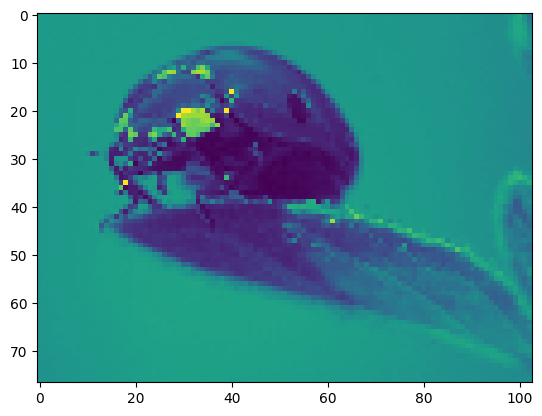

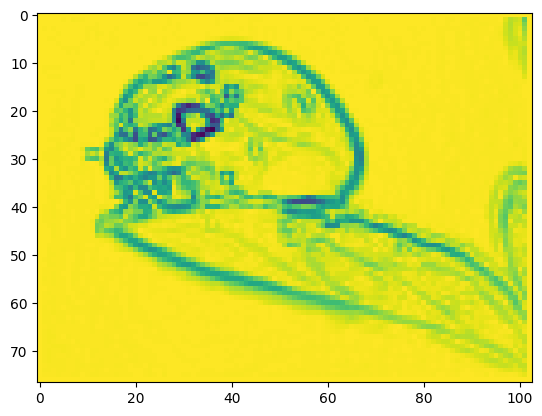

(77, 103)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import a_stern_img, draw_path, load_img, kantenbild

img = "marienkaefer.jpg"
#img = "eule.jpg"

img = load_img("bilder/"+img)
max_pix = 100
downsample = int(np.max(img.shape)//max_pix)
img = img[::downsample, ::downsample]
kanten = kantenbild(img)

plt.figure()
plt.imshow(img)
plt.show()
plt.figure()
plt.imshow(kanten)
plt.show()

h, w = img.shape

start = [h//10, w//10]
ziel = [h//10, w-w//10]
start =[45, 15]
ziel = [45, 80]

distmat = np.linalg.norm(np.stack(np.meshgrid(np.arange(0,h), np.arange(0,w))).transpose(2,1,0)-ziel, axis=-1)
#distmat /= distmat[start[0], start[1]]
print(distmat.shape)
heuristik = np.log(distmat+1e-8)

if False:
    pfad, *_ = a_stern_img(kanten, start, ziel, heuristik)

    plt.figure(figsize=[15,7])
    plt.subplot(1,2,1)
    plt.imshow(img)
    draw_path(pfad, c="red")
    plt.subplot(1,2,2)
    plt.imshow(kanten)
    draw_path(pfad, c="red")
    plt.show()

1
2
3
4
5
6
7
8
9
10


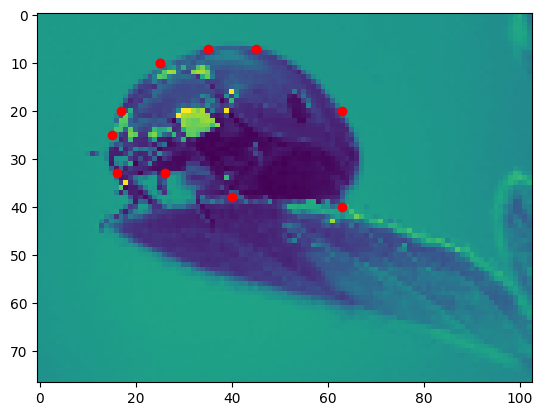

In [ ]:
eckpunkte = np.array([
    [10,25],
    [7,35],
    [7,45],
    [20,63],
    [40,63],
    [38,40],
    [33,26],
    [33,16],
    [25,15],
    [20,17],
    [10,25],
    ])

if True:
    pfad = []
    c = 0
    for start, ziel in zip(eckpunkte[:-1], eckpunkte[1:]):
        print(c:=c+1)
        p,*_ = a_stern_img(kanten, start, ziel, heuristik)
        pfad.append(p)

#print(pfad)
plt.figure()
plt.imshow(img)
for e in eckpunkte:
    plt.scatter(e[1], e[0], c="red")
for p in pfad:
    draw_path(p, "red")
plt.show()

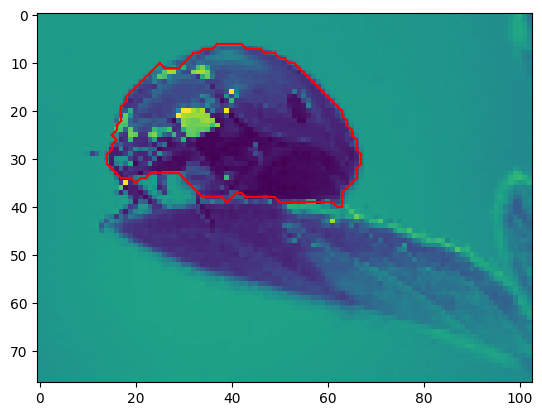

In [4]:
plt.figure()
plt.imshow(img)
for p in pfad:
    draw_path(p, "red")
plt.show()